In [22]:
#K-means Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#Importing the dataset
dataset=pd.read_csv('C:/Users/rukmi/OneDrive/Documents/ML Course/Mall_Customers.csv')
X=dataset.iloc[:,3:].values #Since it is clustering there is no dependent variable in it.
#To visualize in 2D, we are considering the last two features into the model.
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

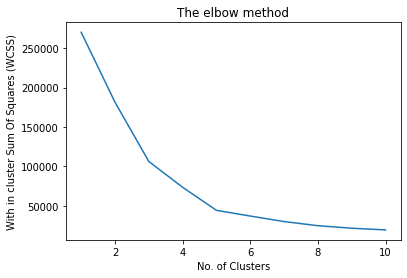

In [24]:
#Elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
#Here we are creating with 10 different clusters.
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42) # we initialize to k-means++ because we cannot fall into random initialization trap.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #'within cluster sum of squares value is obtained by using the object of k-means using inertia_'
plt.plot(range(1,11),wcss)   
plt.title('The elbow method')
plt.xlabel('No. of Clusters')
plt.ylabel('With in cluster Sum Of Squares (WCSS)')
plt.show()
#From this graph, the minimum no. of clusters=5 i.e the elbow point, from where WCSS value falls down rapidly.

In [25]:
#Training K-means model on the dataset.
#So, from the elbow method, that we have used above, we got the minimum no. of clusters to be 5,that we have used to train
#the dataset using the k-means again.
cluster=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=cluster.fit_predict(X)

In [26]:
print(y_kmeans) #Gives to which cluster the datapoint belongs to [0....4] since there are 5 clusters.

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


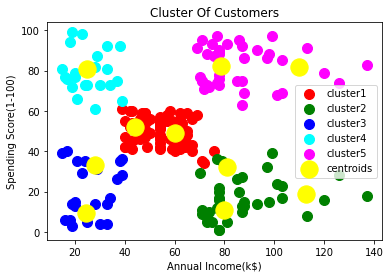

In [34]:
#Visualize the clusters
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='cluster1') #Selects the customers for which y_kmeans is 0 for the column Annual Income i.e. 1st column in X.
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='green',label='cluster2') #y_kmeans is 1
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='blue',label='cluster3') #y_kmeans is 2
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='cluster4') #y_kmeans is 3
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='cluster5') #y_kmeans is 4
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids') #cluster centroids for each cluster.
plt.title('Cluster Of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()
#Thus we can draw few conclusions from the plots in real-time applications.